In [155]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [156]:
GAZP=pd.read_csv("GAZP.csv",sep=';')
GMKN=pd.read_csv("GMKN.csv",sep=';')
HYDR=pd.read_csv("HYDR.csv",sep=';')
LKOH=pd.read_csv("LKOH.csv",sep=';')
ROSN=pd.read_csv("ROSN.csv",sep=';')
SBER=pd.read_csv("SBER.csv",sep=';')
SBERP=pd.read_csv("SBERP.csv",sep=';')
SNGS=pd.read_csv("SNGS.csv",sep=';')
TRNFP=pd.read_csv("TRNFP.csv",sep=';')
VTBR=pd.read_csv("VTBR.csv",sep=';')

In [157]:
data = pd.concat([GAZP['<CLOSE>'],GMKN['<CLOSE>'],HYDR['<CLOSE>'],LKOH['<CLOSE>'],ROSN['<CLOSE>'],SBER['<CLOSE>'],SBERP['<CLOSE>'],SNGS['<CLOSE>'],TRNFP['<CLOSE>'],VTBR['<CLOSE>']],axis=1)
Names = ['GAZP','GMKN','HYDR','LKOH','ROSN','SBER','SBERP','SNGS','TRNFP','VTBR']
data.columns = Names
data

,GAZP,GMKN,HYDR,LKOH,ROSN,SBER,SBERP,SNGS,TRNFP,VTBR
0,143.20,4368.85,1.468,1550.09,185.09,71.90,51.80,26.589,25506.00,0.0708
1,148.25,4505.00,1.534,1586.40,189.01,72.98,53.37,27.341,26700.00,0.0734
2,148.05,4618.00,1.541,1584.79,187.71,73.37,53.80,27.500,26500.00,0.0748
3,152.38,4739.90,1.576,1604.00,193.15,76.70,56.02,27.955,27739.29,0.0776
4,153.47,4785.62,1.543,1600.70,191.05,77.49,56.15,27.702,27750.00,0.0773
...,...,...,...,...,...,...,...,...,...,...
125,195.32,6812.00,1.644,1752.00,219.50,106.23,77.30,30.950,40080.00,0.1024
126,194.90,6755.19,1.630,1735.70,218.53,105.12,76.48,30.850,39945.01,0.1015
127,194.41,6800.00,1.630,1742.18,219.80,104.47,75.89,30.725,38980.00,0.1011
128,192.50,7195.00,1.640,1745.00,221.00,104.35,75.71,31.429,38147.98,0.1006


In [158]:
otn_data  = data.pct_change()
otn_data.dropna(inplace=True)
otn_data

,GAZP,GMKN,HYDR,LKOH,ROSN,SBER,SBERP,SNGS,TRNFP,VTBR
1,0.035265,0.031164,0.044959,0.023424,0.021179,0.015021,0.030309,0.028282,0.046813,0.036723
2,-0.001349,0.025083,0.004563,-0.001015,-0.006878,0.005344,0.008057,0.005815,-0.007491,0.019074
3,0.029247,0.026397,0.022713,0.012121,0.028981,0.045386,0.041264,0.016545,0.046766,0.037433
4,0.007153,0.009646,-0.020939,-0.002057,-0.010872,0.010300,0.002321,-0.009050,0.000386,-0.003866
5,-0.009774,-0.005717,0.000648,-0.002349,-0.014708,-0.004001,0.000178,-0.002238,0.005478,-0.006468
...,...,...,...,...,...,...,...,...,...,...
125,-0.003520,-0.001758,-0.013797,-0.005032,-0.006787,-0.007103,-0.014533,-0.004759,-0.017695,-0.006790
126,-0.002150,-0.008340,-0.008516,-0.009304,-0.004419,-0.010449,-0.010608,-0.003231,-0.003368,-0.008789
127,-0.002514,0.006633,0.000000,0.003733,0.005812,-0.006183,-0.007714,-0.004052,-0.024158,-0.003941
128,-0.009825,0.058088,0.006135,0.001619,0.005460,-0.001149,-0.002372,0.022913,-0.021345,-0.004946


In [159]:
mean = np.array(otn_data.mean()*365)
mean

array([0.88153777, 1.44663341, 0.35507173, 0.35720654, 0.51066908,
       1.09967795, 1.09623127, 0.57026276, 1.20074979, 1.05037452])

In [160]:
year=pd.read_csv("test.csv",sep=';')
print("Записей: ",len(year))

Записей:  248


In [161]:
cov_matrix = otn_data.cov()*248
cov_matrix

,GAZP,GMKN,HYDR,LKOH,ROSN,SBER,SBERP,SNGS,TRNFP,VTBR
GAZP,0.039743,0.028251,0.020726,0.018642,0.029039,0.033526,0.031061,0.020195,0.016466,0.034302
GMKN,0.028251,0.061102,0.019647,0.020921,0.031465,0.031299,0.027359,0.019049,0.009759,0.029627
HYDR,0.020726,0.019647,0.035745,0.013385,0.021209,0.026499,0.025972,0.015023,0.019056,0.023392
LKOH,0.018642,0.020921,0.013385,0.036791,0.018328,0.023685,0.019716,0.012757,0.013414,0.022783
ROSN,0.029039,0.031465,0.021209,0.018328,0.050071,0.038314,0.032647,0.020799,0.016628,0.035147
SBER,0.033526,0.031299,0.026499,0.023685,0.038314,0.067354,0.052462,0.020729,0.021821,0.051156
SBERP,0.031061,0.027359,0.025972,0.019716,0.032647,0.052462,0.060321,0.017741,0.019818,0.044448
SNGS,0.020195,0.019049,0.015023,0.012757,0.020799,0.020729,0.017741,0.032595,0.017875,0.020275
TRNFP,0.016466,0.009759,0.019056,0.013414,0.016628,0.021821,0.019818,0.017875,0.120846,0.015038
VTBR,0.034302,0.029627,0.023392,0.022783,0.035147,0.051156,0.044448,0.020275,0.015038,0.060456


In [162]:
import numpy as np

# Вычисляем собственные значения
eigenvalues = np.linalg.eigvals(cov_matrix)

# Находим максимальное собственное значение
max_eigenvalue = max(eigenvalues)

# Преобразуем максимальное собственное значение в проценты (если требуется)
max_eigenvalue_percentage = max_eigenvalue * 100

print("Найденное сигма: ",max_eigenvalue_percentage)
# Заданный пороговый уровень волатильности портфеля (замените на ваш заданный порог)
threshold_volatility = 50

# Сравниваем максимальное собственное значение с пороговой волатильностью
if threshold_volatility < max_eigenvalue_percentage:
    print("Необходимо увеличить волатильность портфеля до уровня λ.")
else:
    print("Пороговая волатильность портфеля ниже уровня систематического риска λ.")
    sigma = max_eigenvalue


Найденное сигма:  28.938783906908522
Пороговая волатильность портфеля ниже уровня систематического риска λ.


In [163]:
import cvxpy as cp
import numpy as np

# Define the data
n = len(mean)  # Number of assets
R = np.array(mean)
C = np.array(cov_matrix)
sigma = max_eigenvalue

# Define the variables
w = cp.Variable(n)

# Define the objective function
objective = cp.Maximize(w @ R)

# Define the constraints
constraints = [
    cp.sum(w) == 1,  # Sum of weights equals 1
    w >= 0,  # Weights are non-negative
    cp.quad_form(w, C) <= sigma**2  # Volatility constraint
]

# Formulate and solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Retrieve the solution
weights = w.value
max_return = problem.value

print("Optimal weights:", weights)
print("Maximized return:", max_return)


Optimal weights: [2.15831222e-11 1.00000000e+00 1.07530272e-11 1.08397626e-11
 1.39339260e-11 5.70171850e-12 6.92588322e-12 1.40204661e-11
 7.09677321e-12 1.51739746e-11]
Maximized return: 1.4466334146251691


In [164]:
import cvxpy as cp
import numpy as np
from scipy.linalg import sqrtm

# Define the data
n = len(mean)  # Number of assets
R = np.array(mean)
C = np.array(cov_matrix)
sigma = max_eigenvalue

# Define the variables
w = cp.Variable(n)

# Define the objective function
objective = cp.Maximize(w @ R)

# Define the constraints
constraints = [
    cp.sum(w) == 1,  # Sum of weights equals 1
    w >= 0,  # Weights are non-negative
    cp.quad_form(w, C) <= sigma**2  # Volatility constraint
]

# Formulate and solve the problem
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.ECOS)  # Use ECOS solver as an alternative

# Retrieve the solution
weights = w.value
max_return = problem.value

print("Optimal weights:", weights)
print("Maximized return:", max_return)


Optimal weights: [2.15831222e-11 1.00000000e+00 1.07530272e-11 1.08397626e-11
 1.39339260e-11 5.70171850e-12 6.92588322e-12 1.40204661e-11
 7.09677321e-12 1.51739746e-11]
Maximized return: 1.4466334146251691


In [165]:
import cvxpy as cp
import numpy as np

# Define the problem data
returns = np.array(mean)
cov_matrix = np.array(cov_matrix)
portfolio_volatility_limit = max_eigenvalue

num_assets = len(returns)

# Define the variables
weights = cp.Variable(num_assets)

# Define the objective function
objective = cp.Maximize(returns @ weights)

# Define the constraints
constraints = [
    cp.sum(weights) == 1,  # Sum of weights equals 1 (fully invested)
    weights >= 0,  # Weights should be non-negative
    cp.quad_form(weights, cov_matrix) <= portfolio_volatility_limit ** 2  # Volatility constraint
    
]
# Define the constraints
# constraints = [
#     cp.sum(weights) == 1,  # Sum of weights equals 1 (fully invested)
#     weights >= 0,  # Weights should be non-negative
#     cp.sum(cp.abs(weights)) == 1  # Diversification constraint: sum of absolute weights equals 1
# ]


# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Print the optimal weights and objective value
if problem.status == 'optimal':
    optimal_weights = weights.value
    optimal_objective = problem.value

    print("Optimal Weights:")
    for i in range(num_assets):
        print(f"Asset {i+1}: {optimal_weights[i]}")

    print("\nOptimal Objective Value (Expected Return): {:.2%}".format(optimal_objective))

else:
    print("The problem could not be solved.")


Optimal Weights:
Asset 1: 2.158312220219591e-11
Asset 2: 0.999999999893977
Asset 3: 1.0753027177797036e-11
Asset 4: 1.0839762613928872e-11
Asset 5: 1.3933925997916316e-11
Asset 6: 5.701718502829189e-12
Asset 7: 6.92588322283514e-12
Asset 8: 1.4020466069378622e-11
Asset 9: 7.096773206946857e-12
Asset 10: 1.5173974591900656e-11

Optimal Objective Value (Expected Return): 144.66%


In [183]:
import cvxpy as cp
import numpy as np

# Define the problem data
returns = np.array(mean)
cov_matrix = np.array(cov_matrix)
portfolio_volatility_limit = max_eigenvalue

num_assets = len(returns)

# Define the variables
weights = cp.Variable(num_assets)

# Define the objective function
objective = cp.Maximize(returns @ weights)

# Define the constraints
constraints = [
    cp.sum(weights) == 1,  # Sum of weights equals 1 (fully invested)
    weights >= 0,  # Weights should be non-negative
    cp.quad_form(weights, cov_matrix) <= portfolio_volatility_limit ** 2,  # Volatility constraint
    cp.max(weights) <= 0.7,  # Constraint to limit the advantage in the direction of one scale
    cp.min(weights) >=0.01
]

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Print the optimal weights and objective value
if problem.status == 'optimal':
    optimal_weights = weights.value
    optimal_objective = problem.value

    print("Optimal Weights:")
    for i in range(num_assets):
        print(f"{Names[i]} {i+1}: {optimal_weights[i]}")

    print("\nOptimal Objective Value (Expected Return): {:.2%}".format(optimal_objective))

else:
    print("The problem could not be solved.")


Optimal Weights:
GAZP_new 1: 0.28354560008833607
GMKN_new 2: 0.925781938022395
HYDR_new 3: -0.45316580895926145
LKOH_new 4: -0.3211480043853928
ROSN_new 5: -0.6805732074770358
SBER_new 6: 0.07910408636617322
SBERP_new 7: 0.38398669410702707
SNGS_new 8: 0.18619528444622507
TRNFP_new 9: 0.3339209733307401
VTBR_new 10: 0.26235244446000644

Optimal Objective Value (Expected Return): 225.67%


In [167]:
GAZP_new=pd.read_csv("./month/GAZP_new.csv",sep=';')
GMKN_new=pd.read_csv("./month/GMKN_new.csv",sep=';')
HYDR_new=pd.read_csv("./month/HYDR_new.csv",sep=';')
LKOH_new=pd.read_csv("./month/LKOH_new.csv",sep=';')
ROSN_new=pd.read_csv("./month/ROSN_new.csv",sep=';')
SBER_new=pd.read_csv("./month/SBER_new.csv",sep=';')
SBERP_new=pd.read_csv("./month/SBERP_new.csv",sep=';')
SNGS_new=pd.read_csv("./month/SNGS_new.csv",sep=';')
TRNFP_new=pd.read_csv("./month/TRNFP_new.csv",sep=';')
VTBR_new=pd.read_csv("./month/VTBR_new.csv",sep=';')
data_new = pd.concat([GAZP_new['<CLOSE>'],GMKN_new['<CLOSE>'],HYDR_new['<CLOSE>'],LKOH_new['<CLOSE>'],ROSN_new['<CLOSE>'],SBER_new['<CLOSE>'],SBERP_new['<CLOSE>'],SNGS_new['<CLOSE>'],TRNFP_new['<CLOSE>'],VTBR_new['<CLOSE>']],axis=1)
Names = ['GAZP_new','GMKN_new','HYDR_new','LKOH_new','ROSN_new','SBER_new','SBERP_new','SNGS_new','TRNFP_new','VTBR_new']
data_new.columns = Names
data_new

,GAZP_new,GMKN_new,HYDR_new,LKOH_new,ROSN_new,SBER_new,SBERP_new,SNGS_new,TRNFP_new,VTBR_new
0,194.15,7287.00,1.655,1798.00,225.08,103.78,75.89,34.984,39600.00,0.1041
1,200.64,7498.99,1.705,1866.00,233.57,107.08,77.10,36.130,40868.75,0.1093
2,197.40,7395.00,1.660,1903.00,234.00,107.54,75.94,35.227,40200.00,0.1080
3,195.92,7400.00,1.674,1893.00,232.51,107.21,75.65,35.289,40130.00,0.1091
4,198.70,7462.84,1.678,1924.97,244.95,109.57,76.57,35.296,40300.00,0.1091
5,198.80,7490.12,1.665,1907.00,244.20,108.08,75.73,34.880,40150.00,0.1092
6,198.12,7464.00,1.648,1932.70,243.00,107.66,74.60,34.799,40200.00,0.1091
7,194.20,7421.00,1.607,1894.00,242.00,105.21,72.85,34.182,39560.00,0.1078
8,192.71,7500.00,1.600,1931.00,246.86,105.61,72.43,34.459,39710.00,0.1110
9,189.05,7540.00,1.546,1884.00,242.86,104.05,71.37,33.751,38884.28,0.1092


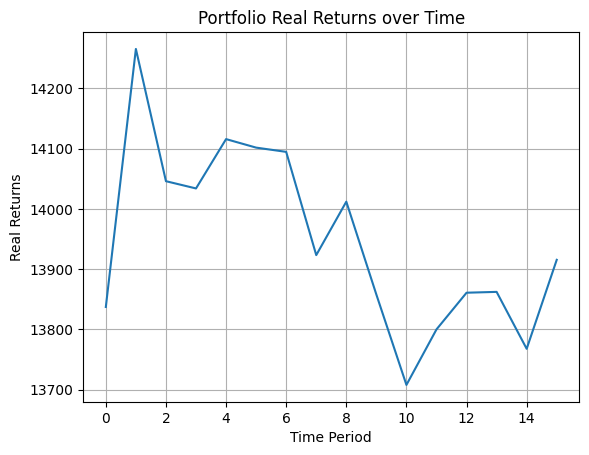

In [168]:
import matplotlib.pyplot as plt

real_returns = []
for i in range(len(data_new)):
    real_returns.append(np.dot(np.array(data_new.iloc[i]), optimal_weights))

plt.plot(real_returns)
plt.xlabel('Time Period')
plt.ylabel('Real Returns')
plt.title('Portfolio Real Returns over Time')
plt.grid(True)
plt.show()

In [169]:
print("Цена портфеля в начале:\t", real_returns[0])
print("Цена портфеля в конце:\t", real_returns[-1])
print("Доходность:\t",(real_returns[-1]-real_returns[0])/real_returns[0]*100,'%')

Цена портфеля в начале:	 13837.236412321141
Цена портфеля в конце:	 13915.518303281196
Доходность:	 0.5657335657743818 %


In [170]:
list(weights.value)

[0.010000000114790639,
 0.6999999992282867,
 0.010000000067695324,
 0.010000000067809923,
 0.010000000077237425,
 0.010000000128857588,
 0.010000000145687341,
 0.010000000081682782,
 0.21999999966554493,
 0.010000000422309403]

In [181]:
import cvxpy as cp
import numpy as np

# Define the problem data
returns = np.array(mean)
cov_matrix = np.array(cov_matrix)
portfolio_volatility_limit = max_eigenvalue

num_assets = len(returns)

# Define the risk-free return
risk_free_return = 0.09

# Append the risk-free return to the mean returns array
returns_with_risk_free = np.append(returns, risk_free_return)

# Extend the covariance matrix to accommodate the risk-free asset
cov_matrix_with_risk_free = np.pad(cov_matrix, [(0, 1), (0, 1)], mode='constant')

# Define the variables
weights = cp.Variable(num_assets + 1)  # +1 for the risk-free asset

# Define the objective function
objective = cp.Maximize(returns_with_risk_free @ weights)

# Define the constraints
constraints = [
    cp.sum(weights) == 1,  # Sum of weights equals 1 (fully invested)
    weights >= 0,  # Weights should be non-negative
    cp.quad_form(weights, cov_matrix_with_risk_free) <= portfolio_volatility_limit ** 2,  # Volatility constraint
    cp.max(weights) <= 0.7,  # Constraint to limit the advantage in the direction of one scale
    cp.min(weights) >=0.01
]

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Print the optimal weights and objective value
if problem.status == 'optimal':
    optimal_weights = weights.value
    optimal_objective = problem.value

    print("Optimal Weights:")
    for i in range(num_assets):
        print(f"Asset {i+1}: {optimal_weights[i]}")
    print("Risk-Free:",optimal_weights[-1])

    print("\nOptimal Objective Value (Expected Return): {:.2%}".format(optimal_objective))

else:
    print("The problem could not be solved.")


Optimal Weights:
Asset 1: 0.010000000539068908
Asset 2: 0.6999999964694522
Asset 3: 0.010000000239096361
Asset 4: 0.01000000023951801
Asset 5: 0.010000000276004768
Asset 6: 0.01000000177271687
Asset 7: 0.010000001752645924
Asset 8: 0.010000000293849282
Asset 9: 0.20999999709327208
Asset 10: 0.0100000011273074
Risk-Free: 0.010000000196791743

Optimal Objective Value (Expected Return): 132.49%
